# [LEGALST-123] Lab 04: Summary Statistics & Aggregating Data & Visualizations

In [1]:
from datascience import *
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Introduction
In this lab, we aim to prepare students for prediction exercises in PSET 1 and PSET 2 by focusing on several key aspects of exploratory data analysis (EDA) and data manipulation using the Nashville police stops dataset. The objectives of this lab are as follows:

- **Summary Statistics**: 
    - We will introduce the basic skills to explore data, and review how to clean our data, including how to handle the missing data. In this section, we will find summary statistics using built-in functions in Python libraries like pandas. 

- **Aggregating Data**:
    - We will introduce data aggregation using Python libraries like pandas. Techniques such as grouping data using the groupby function in pandas will be explored, in order to show how to aggregate data effectively to gain insights. We will also explain the use of pivot tables in pandas. By exploring these methods of aggregation, we will calculate our own summary statistics for relevant columns, particulary `"age"` and `"year"`. This includes calculating the mean and median for these columns and explaining their significance in the context of the dataset.

- **Visualizations**: 
    - We will introduce different ways in which to understand the data with appropriate visualization tools, such as histograms, line plots, bar charts, and box plots. We will also specifically dive into *time series analysis*, where we analyze and visualize police stops trends over time. By the end of the section, students should gain an understanding of creating visualizations on discrete, continuous, and time-specific data. 

<br/>

<hr style="border: 1px solid #fdb515;" />

## Summary Statistics

### Part 1: Acquiring the Data

To retrieve the dataset, we will now load the CSV file we have into a `pandas.DataFrame` object and start exploring the data!
We will use the `path` variable to traverse to the directory where our CSV file is located and use `pd.read_csv` to read and view our files.

In [2]:
stops = pd.read_csv("https://github.com/ds-modules/data/raw/main/nashville_sample.csv", index_col=0)
stops.head(5)

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,1840907,93347,2010-04-18,13140.0,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN...",36.145004,-86.857970,1.0,5103.0,113.0,...,False,NaN,N,False,False,False,False,False,False,False
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
2,431170,1996331,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,...,False,False,N,False,False,False,False,False,False,False
3,2066423,1319451,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",36.139093,-86.880533,1.0,5009.0,123.0,...,False,False,N,False,False,False,False,False,False,False
4,2899480,201349,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,...,False,NaN,N,False,False,False,False,False,False,False


### Part 2: Cleaning and Exploring the Data

From loading our CSV file and using `.head()` above, we see that the fields include variables such as the longitude and latitude, the subject's race/age,  and the date and time of the offense.

Let's also check some basic information about this DataFrame using the `.info()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)) and `.describe()` DataFrame methods ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)).

In [3]:
# the describe function computes summary statistics for the entire DataFrame indexed by the columns
stops.describe()

,index,time,lat,lng,precinct,reporting_area,zone,subject_age
count,1.000000e+03,996.000000,940.000000,940.000000,887.000000,903.000000,887.000000,999.000000
mean,1.491263e+06,47195.963855,36.146446,-86.762884,4.401353,7770.545958,460.828636,36.811812
std,8.823683e+05,24555.357937,0.115117,0.376956,2.248430,12490.193085,225.863415,13.748406
min,1.425000e+03,60.000000,33.522888,-97.407823,1.000000,889.000000,111.000000,16.000000
25%,7.216352e+05,30660.000000,36.109700,-86.789033,2.000000,3020.000000,227.000000,26.000000
50%,1.456574e+06,48810.000000,36.154908,-86.751799,4.000000,5501.000000,425.000000,34.000000
75%,2.282808e+06,67755.000000,36.190809,-86.703740,6.000000,8815.000000,621.000000,46.000000
max,3.091709e+06,86280.000000,36.373107,-84.751067,8.000000,95020.000000,835.000000,82.000000


In [4]:
# the info function displays the name and type of each column, number of non-null entries, and size of the DataFrame
stops.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           1000 non-null   int64  
 1   raw_row_number                  1000 non-null   object 
 2   date                            1000 non-null   object 
 3   time                            996 non-null    float64
 4   location                        1000 non-null   object 
 5   lat                             940 non-null    float64
 6   lng                             940 non-null    float64
 7   precinct                        887 non-null    float64
 8   reporting_area                  903 non-null    float64
 9   zone                            887 non-null    float64
 10  subject_age                     999 non-null    float64
 11  subject_race                    1000 non-null   object 
 12  subject_sex                     998

Note that columns sometimes have different non-null counts. For instance, the `"raw_row_number"` column has 1000 non-null counts while `"zone"` has only 887 non-null counts. This is because the `.info()` method only counts non-null entries. 

Other methods to check null values are using the `.isna()` or `.isnull()`, where you can apply them to the column Series itself or use `.sum()` after to check the null values for all of the columns.

In [5]:
stops.isna().sum()

index                               0
raw_row_number                      0
date                                0
time                                4
location                            0
lat                                60
lng                                60
precinct                          113
reporting_area                     97
zone                              113
subject_age                         1
subject_race                        0
subject_sex                         2
officer_id_hash                     0
type                                0
violation                           2
arrest_made                         0
citation_issued                     0
warning_issued                      0
outcome                             1
contraband_found                  960
contraband_drugs                  960
contraband_weapons                960
frisk_performed                     0
search_conducted                    0
search_person                       0
search_vehic

We can see that there are some columns with only a few null values, but certain columns (`"contraband_found"`, `"contraband_drugs"`, etc) with a lot more null values. We want to investigate this further, but first let's drop some unnecessary columns so we can explore better.

We won't be needing any columns with starting with "raw_" so let's drop all these columns using `.drop()` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)).

#### **Question 1.1**

In [6]:
# you do not have to understand this code for raw_columns -- it is just creating a list of column names that contain "raw_"
raw_columns = [col for col in stops.columns if 'raw_' in col]

# SOLUTION
stops = stops.drop(raw_columns, axis=1)

Now, let's look at the null values of `stops` again! For convenience, we will look at columns that have
 null-values.

In [7]:
stops.isna().sum()[stops.isna().sum() > 1]

time                            4
lat                            60
lng                            60
precinct                      113
reporting_area                 97
zone                          113
subject_sex                     2
violation                       2
contraband_found              960
contraband_drugs              960
contraband_weapons            960
search_basis                  960
reason_for_stop                 2
vehicle_registration_state     13
notes                         828
dtype: int64

#### **Handling Missing Values** 

It is common to encounter missing values in real-life data. Incomplete data can bias and/or reduce the "accuracy" of the results of your machine learning model. There are many different strategies to handle missing values including:  
* Deleting the entire row if the row has many missing values using `.dropna() `([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html))
* Deleting the entire column if the column has many missing values using `.dropna() ` with `axis = 1`
* Replacing the missing values with an arbitrary value 
* Replacing the missing values with the mean, median, or mode using `.fillna()` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html))
* Replacing the missing values with 0

Some missing values explain the process of the data collection or a pattern of the population itself. In this case, it would be useful to use this "missingness" as a feature!

For instance, let's look at our `"notes"` column with 828 non-null values. If you run the code below, you would notice there are some patterns within `"notes"` itself and perhaps then, the missing values (having no notes) might not be due to randomness and may have some association/relationship with other variables within the dataset. 

In [8]:
stops["notes"][stops["notes"].isna() == False] # checks non-null values within the "notes" column 

1                                        tail light out
5                                         RAN STOP SIGN
26                         PASSENGER SIDE HEADLIGHT OUT
28                             SEATBELT WORN IMPROPERLY
32                                                 tags
                             ...                       
979                     SPEEDING --MPH IN --MPH - PACED
982                                      HEAD LIGHT OUT
985                      passenger side tail light out.
986    CARELESS DRIVING\nCUT OFF VEHICLE\nMOVE OVER LAW
994                               headlights on in rain
Name: notes, Length: 172, dtype: object

We know we don't want to delete the entire column or replace the missing values in `"notes"` because it may be an important feature. Looking at our output, we could also understand that we don't want to perform row deletion on the null values in `"notes"`. Run the cell below and see how many rows are left after we delete all the rows with null values within the `"notes"` column!

Note that `.shape` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)) returns the tuple representing the dimensionality (number of rows and columns) of the DataFrame.

In [9]:
stops.dropna(subset = ["notes"]).shape

(172, 30)

If we were to delete all the rows with null values in the `"notes"` column, our 1000-row DataFrame would be reduced to 172 rows. Imagine if we were to delete all rows with null values in *any* column. That would reduce our rows significantly (994 to be exact), completely inhibiting our ability to analyze the data.  **Therefore, we do not want to delete all rows or columns of our null values but instead make appropriate decisions to handle missing data**. 

#### **Question 1.2** 
Given that we did the preliminary work to find an appropriate way to handle the missing values, we will drop the rows with *any* null values **except for the columns `"contraband_found"`, `"contraband_drugs"`, `"contraband_weapons"`, `"search_basis"`, and `"notes"`**. We want to remove these columns entirely for now.

 For this question, first assign `stops_with_necessary_cols` to a DataFrame with all of the columns in the table other than these five columns. Then, drop the rows with null values using `.dropna()`  and update our `stops` DataFrame. 

 Hint 1: If you want to find the column names, you can use `.columns`!
 
 Hint 2: Take a look at the parameters for `.dropna()`.

In [10]:
# SOLUTION
stops_with_necessary_cols = stops.columns.drop(["contraband_found", "contraband_drugs", "contraband_weapons", "search_basis", "notes"]) 
stops = stops.dropna(subset=stops_with_necessary_cols, axis=0)

Now, in the following two cells, try doing `.info()` and `.describe()` on `stops` to see how the DataFrame has changed.

In [11]:
# SOLUTION
stops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       833 non-null    int64  
 1   date                        833 non-null    object 
 2   time                        833 non-null    float64
 3   location                    833 non-null    object 
 4   lat                         833 non-null    float64
 5   lng                         833 non-null    float64
 6   precinct                    833 non-null    float64
 7   reporting_area              833 non-null    float64
 8   zone                        833 non-null    float64
 9   subject_age                 833 non-null    float64
 10  subject_race                833 non-null    object 
 11  subject_sex                 833 non-null    object 
 12  officer_id_hash             833 non-null    object 
 13  type                        833 non

In [12]:
# SOLUTION
stops.describe()

,index,time,lat,lng,precinct,reporting_area,zone,subject_age
count,8.330000e+02,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,1.490302e+06,46950.180072,36.148303,-86.750729,4.428571,7172.012005,463.638655,36.708283
std,8.842343e+05,24713.624164,0.111620,0.079303,2.250534,11071.543165,226.009031,13.746246
min,1.425000e+03,60.000000,33.522888,-87.673566,1.000000,889.000000,111.000000,16.000000
25%,7.152040e+05,30600.000000,36.110928,-86.788732,2.000000,3019.000000,227.000000,26.000000
50%,1.449810e+06,48120.000000,36.155042,-86.751992,4.000000,5405.000000,425.000000,33.000000
75%,2.287868e+06,68040.000000,36.188952,-86.705978,6.000000,8810.000000,621.000000,46.000000
max,3.082012e+06,86280.000000,36.373107,-86.588551,8.000000,92960.000000,835.000000,82.000000


#### **Question 1.3** 
According to your output above of `.describe()`, what are the median and mean values for `"precinct"`, `"zone"`, and `"subject_age"`? You can round them to the nearest hundredth decimal place (e.g. 15.56). 

Hint: The median is the same as the 50% percentile.

_YOUR ANSWER HERE_

In [13]:
# SOLUTION

# precinct's mean = 4.43
# precinct's median = 4.00

# zone's mean = 463.64
# zone's median = 425.00

# subject_age's mean = 36.71
# subject_age's median = 33.00

<br/>

<hr style="border: 1px solid #fdb515;" />

## Data Aggregation

You may have noticed that the functions above reveal data type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we can access more information about the dataset using aggregation functions!

The function `.value_counts()` can be used to access the number of unique values in a given DataFrame or Series. Let's look at the `"search_conducted"` column to observe how many searches were conducted by the Nashville police. 

In [14]:
stops[["search_conducted"]].value_counts()

search_conducted
False               797
True                 36
dtype: int64

Next, let's explore the use of the `.groupby()` function ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)). You might be familiar with Data C8's [group method](https://www.data8.org/fa23/reference/), but the `.groupby()` function from pandas is a bit more complex! 

The below cells are an example of how to use the `.groupby()` function to generate summary statistics of variables in the dataset. In this case, we are finding the average subject age for each subject race/ethnicity.

In [15]:
# since we only want to look at the age and race/ethnicity, let's start by extracting these two columns out of the dataset 
stops_subset = stops[['subject_age', 'subject_race']]

# now, it's easier for us to group using this subset of data
stops_subset.groupby(['subject_race']).mean().reset_index()

,subject_race,subject_age
0,asian/pacific islander,36.823529
1,black,35.544669
2,hispanic,29.888889
3,other,31.600000
4,unknown,37.545455
5,white,38.485294


In [16]:
# if we want to look at the max instead of mean, we simply change the aggregation function at the end, before ".reset_index()"
stops_subset.groupby(['subject_race']).max().reset_index()

,subject_race,subject_age
0,asian/pacific islander,58.0
1,black,73.0
2,hispanic,49.0
3,other,35.0
4,unknown,47.0
5,white,82.0


#### **Question 2** 

In the cell below, set `total_searches` equal to a DataFrame corresponding to the **total count** of searches conducted by the police for each different type of violation. 

*Note:* If you want your output to be formatted exactly like the outputs in the examples above, try throwing a `.reset_index()` at the end of your call. However, this is not required!

Hint: You should be using the `"search_conducted"` and `"violation"` columns.

<!--
BEGIN QUESTION
name: q1
-->

In [17]:
# SOLUTION
total_searches = stops[['search_conducted', 'violation']].groupby('violation').count().reset_index() 
total_searches 

,violation,search_conducted
0,investigative stop,21
1,moving traffic violation,408
2,parking violation,1
3,registration,44
4,safety violation,53
5,seatbelt violation,28
6,vehicle equipment violation,278


<br/>

<hr style="border: 1px solid #fdb515;" />

## Visualizations

Now that we found more information about the Nashville police stops dataset, let's use some visualizations to explore and analyze! Visualization is a crucial component of exploratory data analysis (EDA) because it allows for the intuitive understanding and interpretation of data through graphical representations. In this section, we will introduce five different visualizations: **histograms, bar charts, scatter plots, box plots, and time series**.

### Part 1:  Histograms

A histogram is a graphical representation used to depict the distribution of a dataset. It shows the distribution of a continuous variable. The x-axis of a histogram represents the variable being measured, while the y-axis represents the frequency of the data points (usually a count or proportion). It can be useful for understanding the distribution, central tendency, and spread of the data.

For our first example below, we will demonstrate creating a histogram depicting the distribution of subject age for police stops. 

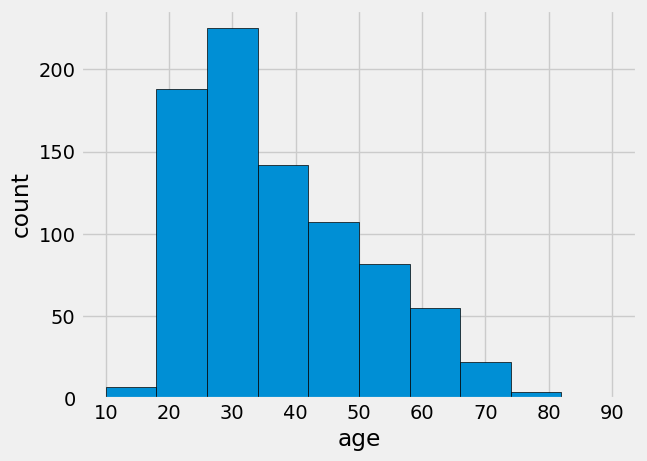

In [18]:
# we have imported matplotlib (a library you have used in Data C8 too!) above
# we first need to specify the number of bins or bin width and range of values of the histogram
our_bins = np.arange(10, 91, 8)
hist_range = (10, 90) 

plt.hist(stops['subject_age'], bins = our_bins, range = hist_range, edgecolor = 'k')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

From the graph above and knowing our bins have a width of 8, we can observe that the age interval (26, 34) has the highest number of subjects. 

#### **Question 3.1.1**
Let's now try to make an overlaid histogram ([documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) comparing the age distribution between distinct values (`"male"` and `"female"`) in `"subject_sex"`. Make a copy of the `stops` table that only corresponds to each distinct value and create a histogram for each. You may set all the optional parameters the same as above for now (bins, range, and edgecolor).

Hint 1: This problem requires you to take manipulate the table before making any visualizations!

Hint 2: For an overlaid histogram, it might be useful to use the parameters `label` for using multiple datasets and `alpha` for changing transparency of the histogram bins.

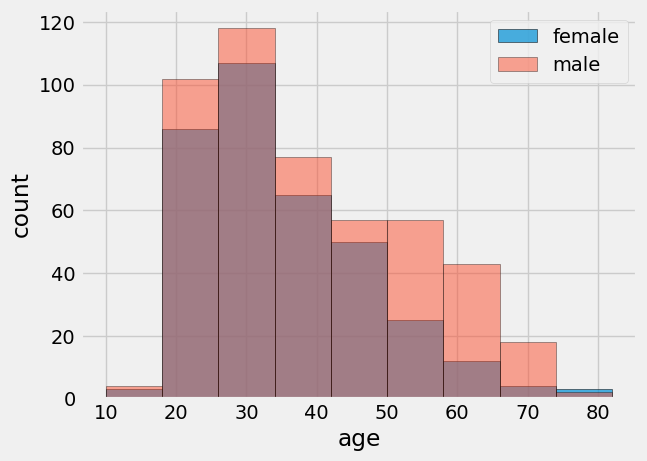

In [19]:
# SOLUTION
female_stops = stops[stops["subject_sex"] == "female"]
male_stops = stops[stops["subject_sex"] == "male"]

num_bins = np.arange(10, 90, 8)
hist_range = (10, 90) 

plt.hist(female_stops['subject_age'], label = "female", alpha = 0.7, bins = num_bins, range = hist_range, edgecolor = 'k')
plt.hist(male_stops['subject_age'], label = "male", alpha = 0.5,  bins = num_bins, range = hist_range, edgecolor = 'k') 
plt.legend(loc= 'upper right')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

#### **Question 3.1.2** 
What differences or similarities do you see between these two groups regarding their police stops?

_YOUR ANSWER HERE_

In [20]:
# SOLUTION

# Answer may vary. However, there seems to be more male police stops than female. 

### Part 2: Bar Charts

A bar chart is a graphical representation used to compare different categories of data with rectangular bars. Unlike histograms, which display continuous data and have bins, bar charts depict discrete data or distinct categories. The x-axis represents the specific categories being compared, while the y-axis represents a measured value (such as a count).

Let's look at the `"violation"` column and see how many police stops have been categorized within each violation. Run the code below. What does the first line help us do? Is there a better way to format the x-axis so it doesn't look as clutttered? 

<BarContainer object of 7 artists>

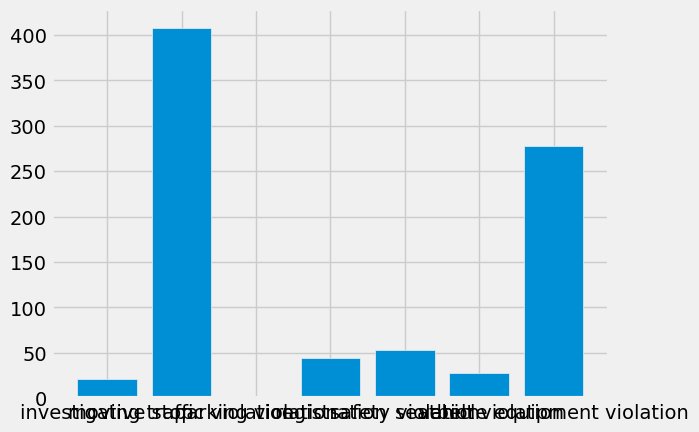

In [21]:
violation_count = stops.groupby('violation').count() # find counts of each distinct value within the violation column
plt.bar(violation_count.index, height = violation_count['subject_age'])

We can easily fix this problem by calling `.barh()` instead of `.bar()` to plot the bar graph horizontally. One thing to note is that `.bar()` requires the positional argument `height` while `.barh()` requires positional argument `width`.

#### **Question 3.2** 
Create a horizontal bar graph to compare different categories of `"violation"`. The code should look very similar to the one above. 

<BarContainer object of 7 artists>

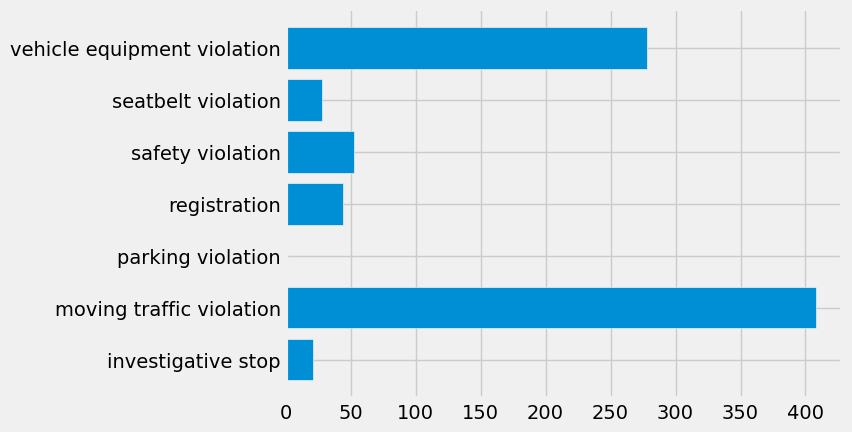

In [22]:
# SOLUTION
violation_count = stops.groupby("violation").count()
plt.barh(violation_count.index, width = violation_count["subject_age"])

### Part 3. Scatter Plots

A scatter plot is a type of data visualization that uses individual data points to represent the values of two continuous variables. The position of each point is determined by its horizontal (x-axis) and vertical (y-axis) values, making it possible to observe relationships or patterns between the two variables. Scatter plots are particularly useful for studying the correlation or association between two numerical variables.

Although this data is not the most suitable for a scatter plot, let's create a scatter plot looking at the correlation between the `"age"` and `"reporting_area"` values as a basic example. 

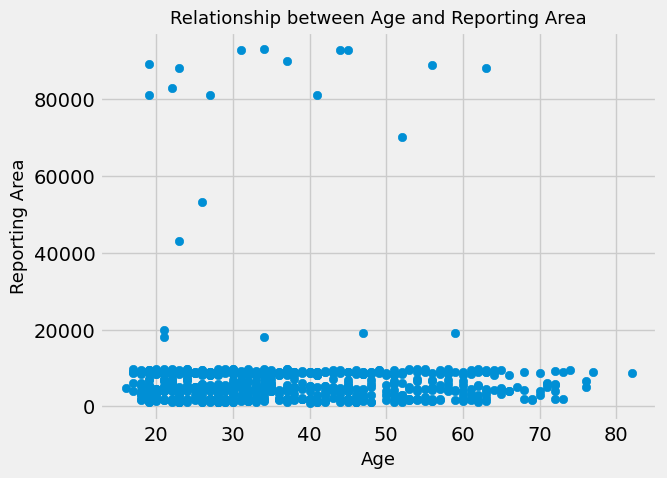

In [23]:
plt.scatter("subject_age", "reporting_area", data = stops);
plt.title('Relationship between Age and Reporting Area', size = 13)
plt.xlabel('Age', size = 13)
plt.ylabel('Reporting Area', size = 13);

#### **Question 3.3**

Looking at the scatter plot above, does there appear to be a high or low correlation between `"subject_age"` and `"reporting_area"`? If there is a high correlation, is it positive or negative? If there is a low correlation, are there any interesting trends or points you notice?

_YOUR ANSWER HERE_

In [24]:
# SOLUTION

# Answer may vary. No real correlation, data doesn't appear to be suitable for scatter plot.

### Part 4. Box Plots

A box plot, also known as a whisker plot or box-and-whisker plot, is a standardized way of displaying the distribution of data based on a five-number summary: the minimum, first quartile (Q1), median (second quartile, Q2), third quartile (Q3), and the maximum. Box plots provide a visual summary of these key statistics and are particularly useful for comparing distributions across different groups or categories. They offer insights into the central tendency, variability, and skewness of the data, as well as the presence of potential outliers.

**Box (Rectangle)**: The box represents the interquartile range (IQR), which encompasses the middle 50% of the data. The top and bottom edges of the box mark the third quartile (75th percentile, Q3) and the first quartile (25th percentile, Q1), respectively. The line inside the box represents the median (50th percentile, Q2).

**Whiskers**: The whiskers extend from the box and represent the range in which most of the data falls. Data points from (Q1 - (1.5 * IQR)) to (Q3 + (1.5 * IQR)) are considered within the whiskers' range.

**Individual Points**: Any data points that fall outside the whiskers' range are plotted individually as points. These are potential outliers and are drawn as white dots.


Let's look at example down below, looking at the age distribution for all the subject races.

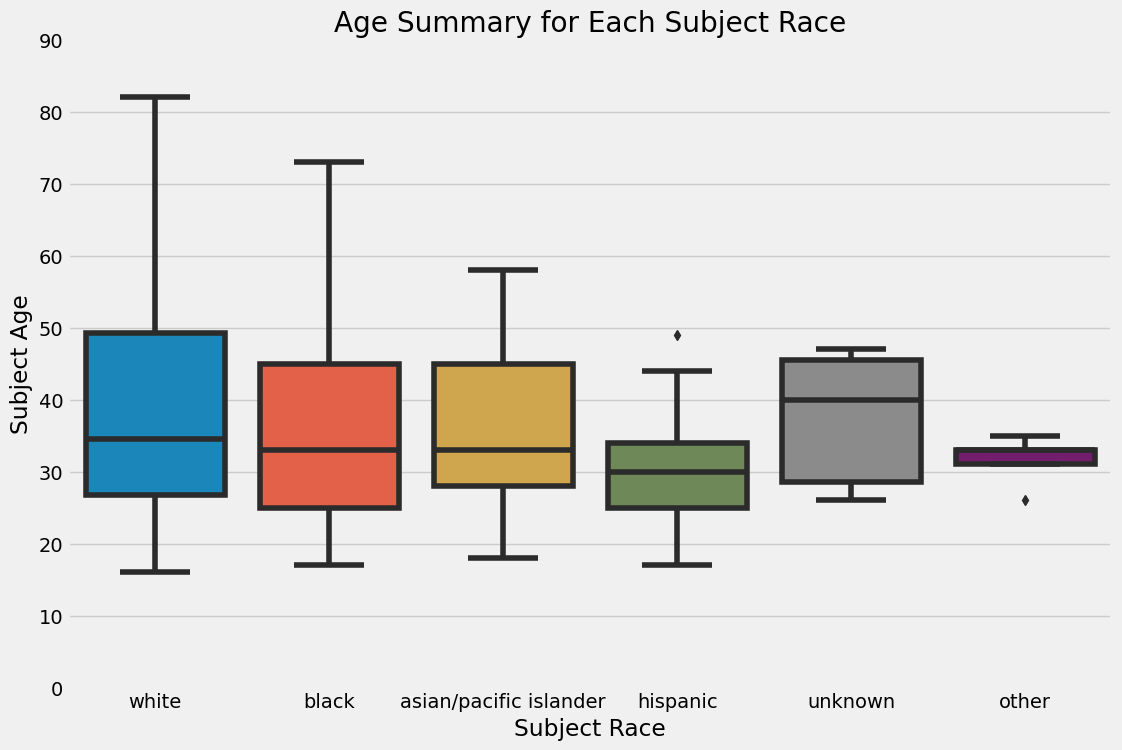

In [25]:
# first, we want to import seaborn because the library will be helpful in the future!
import seaborn as sns

plt.figure(figsize = (12, 8))
sns.boxplot(data = stops, x = 'subject_race', y = 'subject_age') #, palette='Set2'
plt.title('Age Summary for Each Subject Race')
plt.xlabel('Subject Race')
plt.ylabel('Subject Age')
plt.ylim(0, 90)
plt.show()

Using this visualization ([documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)), we can get a sense of the summary statistics of the subject's age within each race/ethnicity. Recall that we did something very similar in our data aggregation section!

#### **Question 3.4** 
Understanding the features of the box-and-whisker plot, write at least two interesting observations. 

_YOUR ANSWER HERE_

In [26]:
# SOLUTION

# Answer may vary.

### Part 5: Time Series Analysis

For the last part of the lab, we will introduce you to time series analysis! Time series analysis is a method used to examine data points collected sequentially over time. These data points, plotted on a graph with time on the horizontal (x-axis) and the variable of interest on the vertical (y-axis), show how a particular variable evolves over time. By studying past patterns in this sequence, time series analysis can help predict future values. It's especially useful for understanding trends, cycles, or any recurring patterns in data over a time period.

Before going straight into time series analysis, we need to manipulate the data in order for the visualization to work. In this particular section, we will learn how to:
1. Convert a column to DateTime objects
1. Use the DateTime library
1. Reindex to Clean Up Visualizations

#### **Question 3.5**

The [datetime](https://docs.python.org/3/library/datetime.html) module supplies classes for manipulating dates and times. Using the pandas function `pd.to_datetime()` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)), change the `"date"` column of `time_series_df` to a Series containing pandas datetime objects. We want to convert to datetime because `"date"` currently consists of strings, and this won't plot a graph over time. 

In [27]:
# SOLUTION
time_series_df = stops.copy()
time_series_df['date'] = pd.to_datetime(time_series_df['date'], format='%Y-%m-%d')
time_series_df['date'][0]

Timestamp('2010-04-18 00:00:00')

Let's try to understand datetime a bit better! Run the following line to see what it outputs!

In [28]:
print("For the date,", time_series_df['date'][0], "the year is", time_series_df['date'][0].year, "and the month is", time_series_df['date'][0].month, ".")

For the date, 2010-04-18 00:00:00 the year is 2010 and the month is 4 .


As you can see, the datetime library has multiple types to work with! Now let's look at `.strftime()` method, shortened for "string format time". The primary purpose of this method is to format datetime objects as strings. By using various format codes, you can represent the date and time in many different ways.

Some common format codes used with `.strftime()`:
* %Y: Year with century (e.g. "2023")
* %m: Month as a zero-padded decimal (e.g. "01" for January)
* %d: Day of the month as a zero-padded decimal (e.g. "09" for the 9th of the month)
* %B: Full month name (e.g. "January")
* %b: Shortened month name (e.g. "Jan")

Run the code below to see an example of how we can use `.strftime()`.

In [29]:
time_series_df['date'][0].strftime('%b %Y')

'Apr 2010'

#### **Question 3.6** 

Using our new `"date"` column, apply `.strftime()` to create a new column in `time_series_df` called `"year"` that contains the year in the standard 4-digit format (i.e. 2010). As a heads-up, it will be difficult to use [.apply()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) for this, so try using a list comprehension or for-loop instead! 

**Hint:** For the iteration in your list comprehension or for-loop, you'll want to use `.index`, instead of `np.arange()` like you may have seen in Data 8. This is because some of our indexes were deleted during our data cleaning process, so using `np.arange()` will result in a `KeyError`! An example of this would look like: `for i in time_series_df.index`.

In [30]:
# SOLUTION
time_series_df['year'] = [time_series_df['date'][i].strftime('%Y') for i in time_series_df.index]
time_series_df['year']

0      2010
1      2015
2      2015
3      2013
4      2010
       ... 
995    2012
996    2012
997    2016
998    2011
999    2012
Name: year, Length: 833, dtype: object

#### **Question 3.7** 

Now that we have created our `"year"` column, we want to aggregate it by that column to count how many total searches were conducted every year. Assign this to the `grouped_count` variable. Make sure to reindex the DataFrame so that `"year"` is no longer the index but a regular column, for plotting purposes.

**Hint:** [.reset_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) is helpful for reindexing! 

In [31]:
#SOLUTION 
grouped_count = time_series_df.groupby(["year"]).agg("count")
grouped_count = grouped_count.reset_index().sort_values('year')
grouped_count

,year,index,date,time,location,lat,lng,precinct,reporting_area,zone,...,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_registration_state,notes
0,2010,73,73,73,73,73,73,73,73,73,...,4,4,73,73,73,73,4,73,73,9
1,2011,121,121,121,121,121,121,121,121,121,...,5,5,121,121,121,121,5,121,121,23
2,2012,124,124,124,124,124,124,124,124,124,...,9,9,124,124,124,124,9,124,124,22
3,2013,110,110,110,110,110,110,110,110,110,...,2,2,110,110,110,110,2,110,110,23
4,2014,99,99,99,99,99,99,99,99,99,...,4,4,99,99,99,99,4,99,99,15
5,2015,93,93,93,93,93,93,93,93,93,...,3,3,93,93,93,93,3,93,93,23
6,2016,67,67,67,67,67,67,67,67,67,...,1,1,67,67,67,67,1,67,67,21
7,2017,82,82,82,82,82,82,82,82,82,...,3,3,82,82,82,82,3,82,82,0
8,2018,59,59,59,59,59,59,59,59,59,...,5,5,59,59,59,59,5,59,59,0
9,2019,5,5,5,5,5,5,5,5,5,...,0,0,5,5,5,5,0,5,5,0


With everything set, let's look at the number of searches conducted over time! 

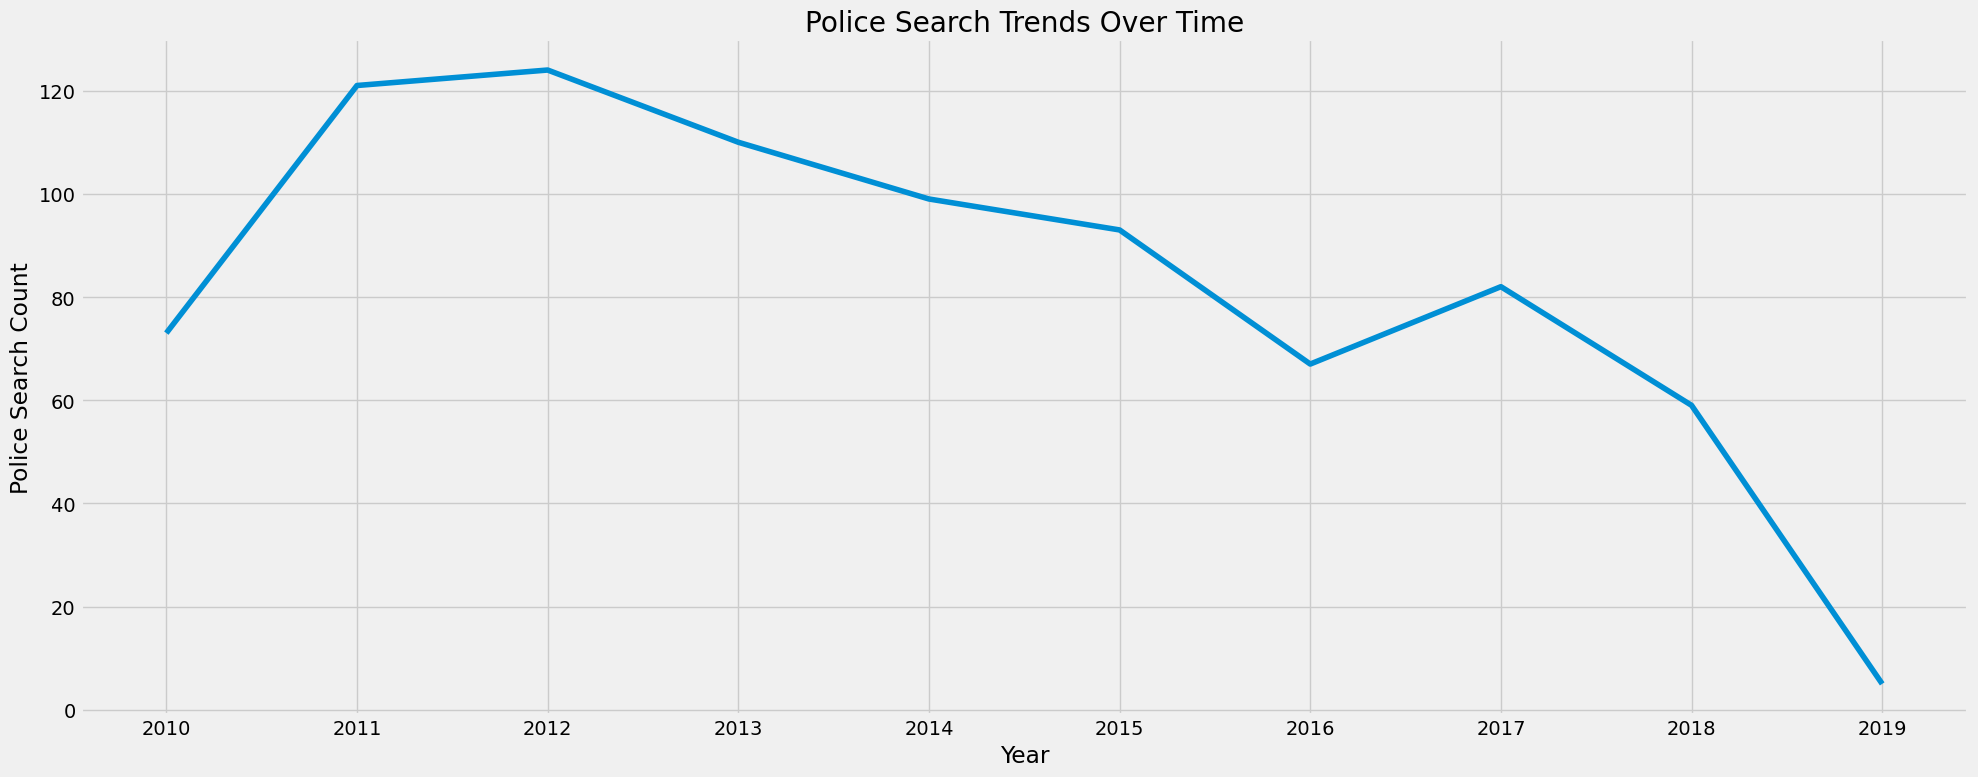

In [32]:
# Create a line plot to visualize trends over the years
plt.figure(figsize = (20, 8))
plt.plot(grouped_count["year"], grouped_count["search_conducted"])

plt.xlabel('Year')
plt.ylabel('Police Search Count')
plt.title('Police Search Trends Over Time')
 
plt.tight_layout()  
plt.show()

Now, it's your turn to practice and create your own time series analysis! 

#### **Question 3.8**
Let's say we want to only examine how **moving traffic violations** evolve over time. Using the example above, plot a time series where we aggregate the data by yearly frequency. 

**Hint 1:** You'll want to manipulate the DataFrame before going making the visualization. The aggregation and visualization process should be similar to what we did above! You can start by copying and pasting our visualization code, and then change the column| and DataFrame labels where needed.

**Hint 2:** If you are stuck on where you can find the information regarding moving traffic violations, refer to question 2! 

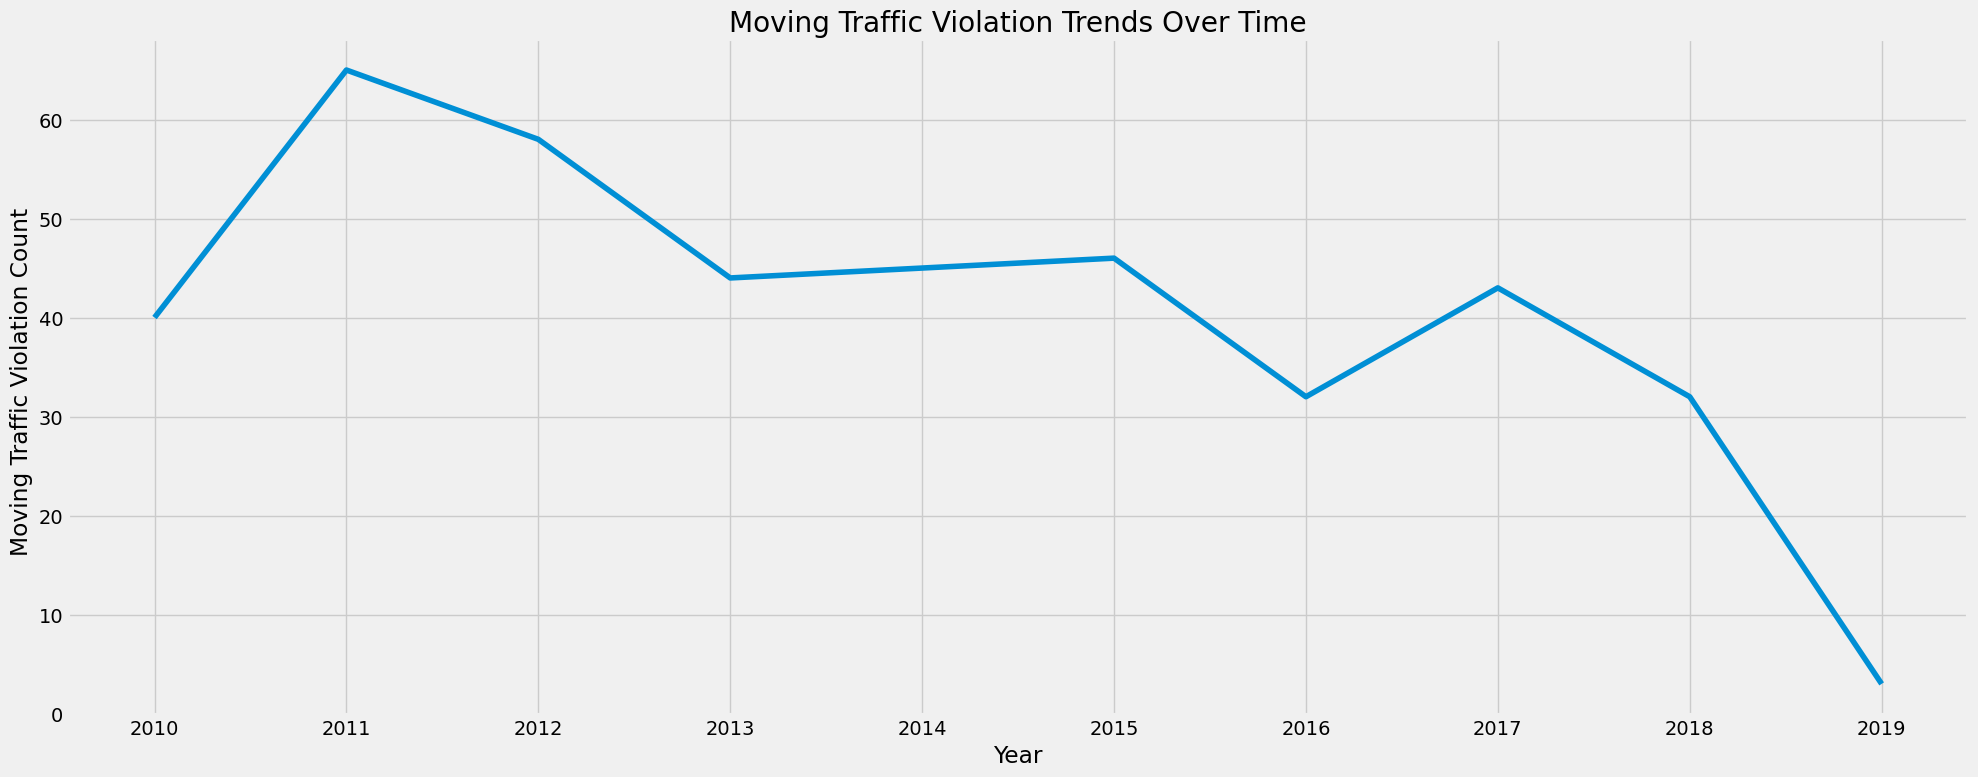

In [33]:
# SOLUTION
violation_df = time_series_df[time_series_df["violation"] == "moving traffic violation"]
violation_yearly = violation_df.groupby("year").agg("count").reset_index()

plt.figure(figsize = (20, 8))
plt.plot(violation_yearly["year"], violation_yearly["violation"])

plt.xlabel('Year')
plt.ylabel('Moving Traffic Violation Count ')
plt.title('Moving Traffic Violation Trends Over Time')

plt.tight_layout()
plt.show()

We can also draw multiple time series and compare them together. To do this, `.pivot_table()` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html#pandas.DataFrame.pivot_table)) can be very helpful! Let's look at the code below and run the following cell to see how we created this multi-variate time series analysis. 

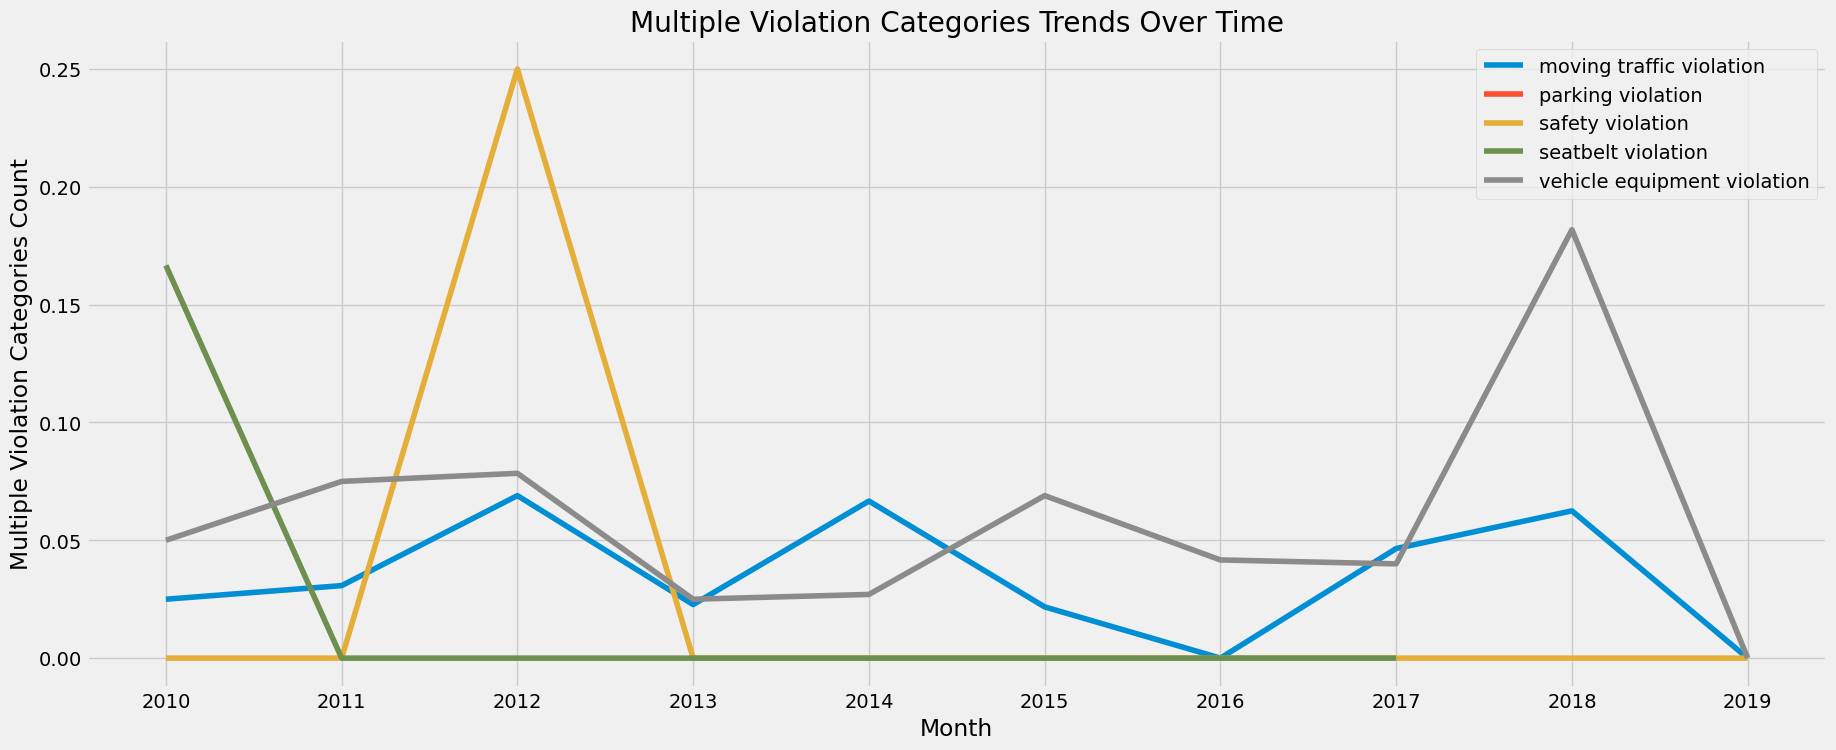

In [34]:
# This step is similar to above where we are working with datetime
multiple_violation = stops.copy()
multiple_violation['date'] = pd.to_datetime(multiple_violation["date"])
multiple_violation['year'] = [multiple_violation['date'][i].strftime('%Y') for i in multiple_violation.index]


multiple_violation_year = multiple_violation.pivot_table(index = "year", columns = "violation", values = "search_conducted") # here, look closely at the parameters!
multiple_violation_year = multiple_violation_year.drop(["investigative stop", "registration"], axis = 1)
plt.figure(figsize = (20, 8))
for column in multiple_violation_year.columns: # going through all columns, which correspond to the different violations
    plt.plot(multiple_violation_year.index, multiple_violation_year[column], label = column) 

plt.legend(loc = 'upper right')
plt.xlabel('Month')
plt.ylabel('Multiple Violation Categories Count')
plt.title('Multiple Violation Categories Trends Over Time')
plt.show()

#### **Question 3.9**
Last practice question! For this question, let's examine the changes in the total count of searches conducted over time (at a yearly frequency) among different groups of `"subject_race"`. We specifically want to look at three different groups: `"black"`, `"white"`, and `"hispanic"` groups. Again, feel free to use the example above as a starting point and adjust the columns and DataFrame accordingly.

**Hint 1:** Just like the example above, we want to use the `.pivot_table()` method. 

**Hint 2:** We want to filter out the DataFrame before the for-loop so that we are only examining the three categories! 

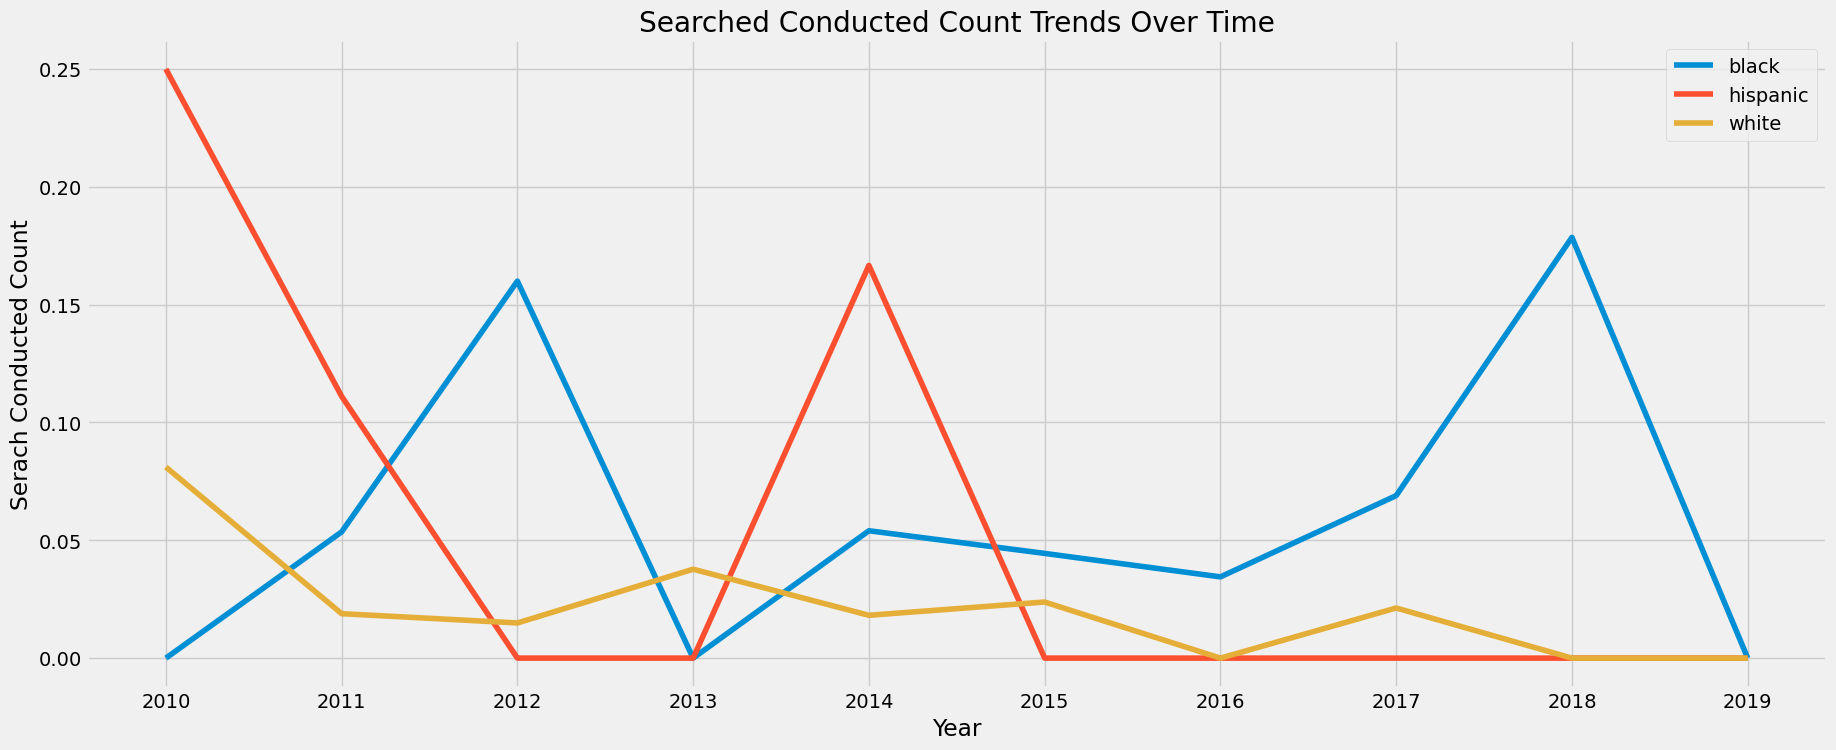

In [35]:
# SOLUTION
race_df = stops.copy() 
race_df['date'] = pd.to_datetime(race_df["date"])
race_df['year'] = [multiple_violation['date'][i].strftime('%Y') for i in multiple_violation.index]

race_df_year = race_df.pivot_table(index = "year", columns= "subject_race", values = "search_conducted") #here, look closely to the parameters!
race_df_year = race_df_year.drop(["asian/pacific islander", "other", "unknown"], axis=1)

plt.figure(figsize=(20, 8))
for column in race_df_year.columns: #going through all columns within multiple violation. 
    plt.plot(race_df_year.index,race_df_year[column], label = column) 
    
plt.legend(loc= 'upper right')
plt.xlabel('Year')
plt.ylabel('Serach Conducted Count')
plt.title('Searched Conducted Count Trends Over Time')
plt.show()

<br/>

<hr style="border: 1px solid #fdb515;" />

## Conclusion 

#### **Question 4.1**

Summarize any key or interesting findings from your data analysis. Discuss insights or patterns observed during the analysis.

Reflect on the importance of data cleaning, summary statistics, visualization, and data aggregation in exploratory data analysis.

_YOUR ANSWER HERE_

In [36]:
# SOLUTION

# Answer may vary.

<br/>

<hr style="border: 1px solid #fdb515;" />